In [44]:
import pandas as pd
import numpy as np
import tpot
from sklearn.model_selection import train_test_split
import imblearn
import matplotlib.pyplot as plt
%matplotlib inline
#To avoid warnings
import warnings
warnings.filterwarnings('ignore')
import xgboost


In [16]:
df = pd.read_csv('model_df.csv')

In [17]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [18]:
df.columns

Index(['country_left', 'genre', 'is_presale', 'max_tickets', 'num_markets',
       'price_max', 'price_min', 'sold_out', 'state', 'subgenre',
       'venue_name_left', 'Unnamed: 0_y', 'Venue', 'City', 'Capacity',
       'popularity_sk', 'headliner', 'support', 'metro_area', 'country_right',
       'city_name', 'days_to_event'],
      dtype='object')

In [19]:
train_df = df[['is_presale','num_markets','sold_out','days_to_event', 'Capacity']]

In [20]:
train_df = train_df.dropna()

In [21]:
train_df.columns

Index(['is_presale', 'num_markets', 'sold_out', 'days_to_event', 'Capacity'], dtype='object')

In [22]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2563 entries, 0 to 2562
Data columns (total 5 columns):
is_presale       2563 non-null int64
num_markets      2563 non-null float64
sold_out         2563 non-null float64
days_to_event    2563 non-null int64
Capacity         2563 non-null object
dtypes: float64(2), int64(2), object(1)
memory usage: 120.1+ KB


In [23]:
train_df.sold_out.value_counts()

0.0    2288
1.0     275
Name: sold_out, dtype: int64

In [24]:
train_df['Capacity'] = train_df['Capacity'].str.replace(',', '')
train_df['Capacity'] = train_df['Capacity'].apply(lambda x: x.split('[')[0])
train_df['Capacity'] = train_df['Capacity'].apply(lambda x: x.split(' ')[0])
train_df['Capacity'] = train_df['Capacity'].apply(lambda x: x.split('-')[0])
train_df['Capacity'] = train_df['Capacity'].astype(int)

In [25]:
for col in train_df.columns:
    train_df[col] = train_df[col].astype('int')

In [26]:
X = train_df.drop(columns=['sold_out'])
y = train_df['sold_out']

In [27]:
X.isnull().sum()

is_presale       0
num_markets      0
days_to_event    0
Capacity         0
dtype: int64

In [28]:
x_train, x_test, y_train, y_test = train_test_split(X,y)

In [42]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=27, ratio=1.0)
x_train, y_train = sm.fit_sample(x_train, y_train)

In [75]:
from tpot import TPOTClassifier

tpot = TPOTClassifier(generations=50, population_size=50, verbosity=2, n_jobs=2, cv=10, scoring='precision_weighted')
tpot.fit(x_train, y_train)
print(tpot.score(x_test, y_test))
tpot.export('concert_pipeline.py')

Generation 1 - Current best internal CV score: 0.9185693226031502
Generation 2 - Current best internal CV score: 0.9185693226031502
Generation 3 - Current best internal CV score: 0.9185693226031502
Generation 4 - Current best internal CV score: 0.9224938304086805
Generation 5 - Current best internal CV score: 0.9224938304086805
Generation 6 - Current best internal CV score: 0.9231984203602227
Generation 7 - Current best internal CV score: 0.9231984203602227
Generation 8 - Current best internal CV score: 0.9231984203602227
Generation 9 - Current best internal CV score: 0.9231984203602227
Generation 10 - Current best internal CV score: 0.9269130340793081
Generation 11 - Current best internal CV score: 0.9269130340793081
Generation 12 - Current best internal CV score: 0.9269130340793081
Generation 13 - Current best internal CV score: 0.9269130340793081
Generation 14 - Current best internal CV score: 0.9269130340793081
Generation 15 - Current best internal CV score: 0.9269130340793081


TP

In [76]:
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from tpot.builtins import ZeroCount


# Average CV score on the training set was:0.9269130340793081
exported_pipeline = make_pipeline(
    ZeroCount(),
    ZeroCount(),
    Normalizer(norm="max"),
    GradientBoostingClassifier(learning_rate=0.5, max_depth=8, max_features=0.35000000000000003, min_samples_leaf=15, min_samples_split=16, n_estimators=100, subsample=0.8500000000000001)
)

exported_pipeline.fit(x_train, y_train)
results = exported_pipeline.predict(x_test)


In [77]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [78]:
accuracy_score(y_test,results)

0.8736349453978159

In [79]:
confusion_matrix(y_test,results)

array([[524,  54],
       [ 27,  36]])

In [80]:
model.estimators_[2]

ExtraTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                    max_features=0.6500000000000001, max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=6,
                    min_weight_fraction_leaf=0.0, random_state=342780460,
                    splitter='random')

In [81]:
feature_names = X.columns

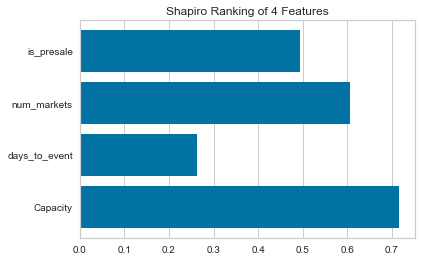

In [82]:
from yellowbrick.features import Rank1D
# Instantiate the 1D visualizer with the Sharpiro ranking algorithm
visualizer = Rank1D(features=feature_names, algorithm='shapiro')
visualizer.fit(X, y)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
visualizer.poof()                   # visualise

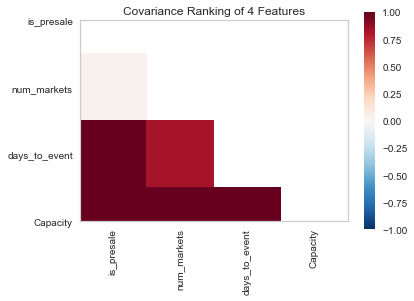

In [83]:
from yellowbrick.features import Rank2D
# Instantiate the visualizer with the Pearson ranking algorithm
visualizer = Rank2D(features=feature_names, algorithm='covariance') 
#visualizer = Rank2D(features=feature_names, algorithm='pearson')
visualizer.fit(X, y)                
visualizer.transform(X)             
visualizer.poof()

In [84]:
from sklearn.metrics import classification_report

In [85]:
print(classification_report(y_test, results))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93       578
           1       0.40      0.57      0.47        63

    accuracy                           0.87       641
   macro avg       0.68      0.74      0.70       641
weighted avg       0.90      0.87      0.88       641



In [86]:
x = classification_report(y_test, results)

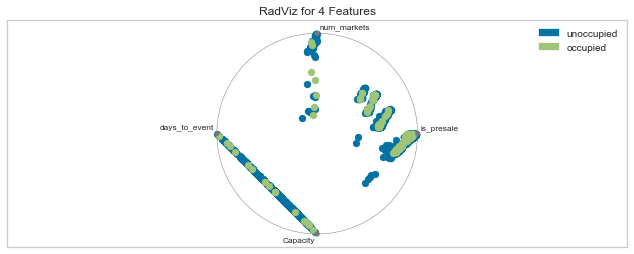

In [87]:
# Specify the features of interest and the classes of the target 
features = X.columns
classes = ['unoccupied', 'occupied']
# Instantiate the visualizer
visualizer = visualizer = RadViz(classes=classes, features=features,size = (800,300))
visualizer.fit(X, y) 
visualizer.transform(X)  
visualizer.poof()

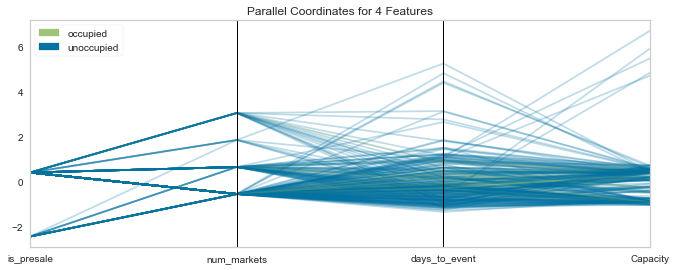

In [91]:
from yellowbrick.features import ParallelCoordinates
features = feature_names
classes = ['unoccupied', 'occupied']
# Instantiate the visualizer
visualizer = visualizer = ParallelCoordinates(
    classes=classes, features=features,
    normalize='standard', sample=0.1, size = (800,300)
)
visualizer.fit(X, y)     
visualizer.transform(X)   
visualizer.poof()

In [89]:
# Classifier Evaluation Imports
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from yellowbrick.classifier import ClassificationReport,ConfusionMatrix

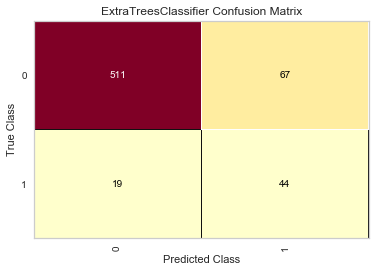

In [90]:
visualizer = ConfusionMatrix(model)
visualizer.fit(x_train, y_train)  
visualizer.score(x_test, y_test)
g = visualizer.poof()